# <span style="color:#BC48CD"> Numerical Simulation Laboratory (NSL)</span>
## <span style="color:#BC48CD">  Esercitazione 12 - Keras - Deep & Convolutional Neural Network image recognition </span>
#### <span style="color:#9C19ED">Author: </span>    Alessia Sambruna <span style="color:#9C19ED">Student number: </span>     942397



L'obiettivo di questa esercitazione consiste nell'allenare una rete neurale in modo da farle riconoscere delle cifre scritte a mano, utilizzando l'applicazione `gimp`. 

### La costruzione di una DNN 
Riportiamo di seguito una modalità di costruzione di una Deep Neural Network. 
Di seguito carichiamo le librerie necessarie e i dataset che utilizzeremo come training da `mnist`


In [21]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import optimizers, losses, metrics
from keras.datasets import mnist 
from keras.layers import Dense, Dropout
from PIL import Image

In [22]:
seed=0 #Ogni libreria ha un generatore di numeri casuali: da settare per poter fare calcoli riproducibili. 
#Viene settato per numpy e per tensor flow 
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

Impostiamo di seguito le caratteristiche delle immagini prese in input. 
Le immagini sono quadrate, $28x28$ pixels, a ciascun pixel è assegnato un valore tra i $256$ possibili valori della scala di grigi

In [23]:
from keras.datasets import mnist
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits: numero di classi da predire. 

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


In [24]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)#Le label erano la cifra : 
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 784)
X_test shape: (10000, 784)
X_train shape: (60000, 784)
Y_train shape: (60000, 10)


Creiamo quindi un primo esempio di DNN, composto da diversi layers. 
- il primo Layer è sempre un Sequential()
- aggiungiamo quindi un layer denso, con valori di input definiti precedentemente $28x28 = 784$
- aggiungiamo un ulteriore layer denso con funzione di attivazione "relu"
- aggiungiamo un dropout per --- 
- poniamo come ultimo layer, un dense con funzione di attivazione softmax di dimensione definita dalla dimensione dell'output, cioè $10$ corrispondenti al numero di cifre che la rete deve essere in grado di riconoscere. 


In [25]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))    
    
    return model

print('Model architecture created successfully!')


Model architecture created successfully!


Definiamo la compilazione con e scegliamo un ottimizzatore e una funzione costo. 
Fissiamo la funzione costo e usiamo la *cross entropy* 

In [26]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

def compile_model(opt):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')



Model compiled successfully and ready to be trained.


# Esercizio 1
Modificare la DNN  incrementando il numero di epoche ad un numero adeguato. 
Utilizziamo almeno altri due Ottimizzatori diversi da SGD. 
Plottiamo il grafico per l'accuracy e la loss per i dati di training e di validation e commentiamo le performances

## Soluzione Esercizio 12.1


Modifichiamo la DNN creata precedentemente utilizzando divesi ottimizzatori. Testiamo i seguenti ottimizzatori :SGD, Adam, Adadelta, Adagrad

Parametri di training del modello 

In [27]:
# training parameters
batch_size = 60
epochs = 10

optimizers = [SGD(), Adam(), Adagrad(), Adamax()]
names = ['SGD','Adam', 'Adagrad', 'Adamax']

# create the deep neural net (list with models using different optimizers)
model_DNN = [compile_model(optimizer) for optimizer in optimizers]



In [28]:
# train DNN and store training info in history
histories = [model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test)
                      ) for model in model_DNN]


Epoch 1/10
1000/1000 [==============================] - 6s 5ms/step - loss: 0.9415 - acc: 0.7240 - val_loss: 0.3834 - val_acc: 0.9013
Epoch 2/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.4665 - acc: 0.8682 - val_loss: 0.2948 - val_acc: 0.9191
Epoch 3/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3818 - acc: 0.8928 - val_loss: 0.2516 - val_acc: 0.9295
Epoch 4/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3360 - acc: 0.9055 - val_loss: 0.2248 - val_acc: 0.9359
Epoch 5/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.2990 - acc: 0.9156 - val_loss: 0.2059 - val_acc: 0.9408
Epoch 6/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.2780 - acc: 0.9222 - val_loss: 0.1904 - val_acc: 0.9451
Epoch 7/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.2541 - acc: 0.9290 - val_loss: 0.1766 - val_acc: 0.9476
Epoch 8/10
1000/1000 [==============================] - 5s 5ms

In [29]:
#colors = {"SGD":"#4d9de0", "Adam":"#e15554", "Adadelta":"#e1bc29", "Adagrad":"#3bb273"}
colors = {"Test" :"#51a3a3", "Train" : "#f7b538"}

SGD
  Test loss: 0.14834840595722198
  Test accuracy: 0.9532999992370605
Adam
  Test loss: 0.09872006624937057
  Test accuracy: 0.9801999926567078
Adagrad
  Test loss: 0.29312556982040405
  Test accuracy: 0.9192000031471252
Adamax
  Test loss: 0.06302744150161743
  Test accuracy: 0.9799000024795532


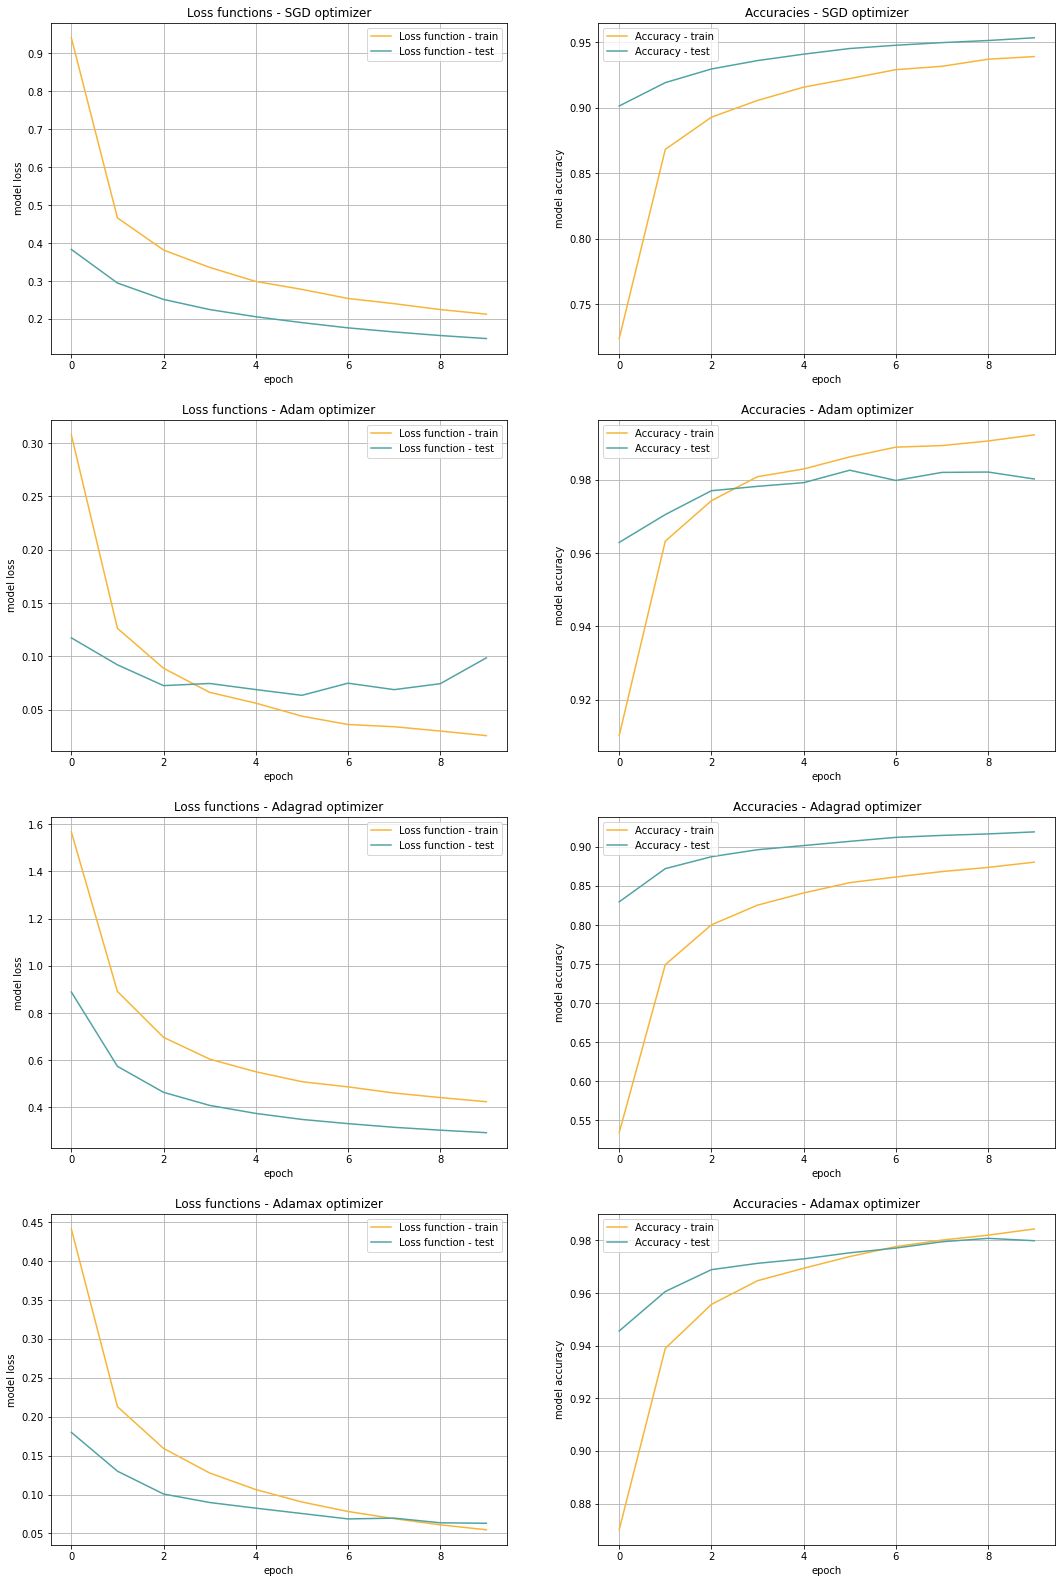

In [30]:
# evaluate model
scores = [model.evaluate(X_test, Y_test, verbose=0) for model in model_DNN]

# print performance
for i in range(len(optimizers)):
    print(str(names[i]))
    print('  Test loss:', scores[i][0])
    print('  Test accuracy:', scores[i][1])

# look into training history
fig, plts = plt.subplots(len(optimizers), 2)
fig.set_figwidth(18)
fig.set_figheight(7*len(optimizers))

for i in range(len(optimizers)):
    #summarize history for loss 
    plts[i][0].set_title("Loss functions - " + names[i] + ' optimizer')
    plts[i][0].plot(histories[i].history['loss'], color = colors["Train"])
    plts[i][0].plot(histories[i].history['val_loss'], color = colors["Test"])
    plts[i][0].set_ylabel('model loss')
    plts[i][0].set_xlabel('epoch')
    plts[i][0].legend(['Loss function - train', 'Loss function - test'], loc='best')
    plts[i][0].grid()
    # summarize history for accuracy
    plts[i][1].set_title("Accuracies - " + names[i] + ' optimizer')
    plts[i][1].plot(histories[i].history['acc'], color = colors["Train"])
    plts[i][1].plot(histories[i].history['val_acc'], color = colors["Test"])
    plts[i][1].set_ylabel('model accuracy')
    plts[i][1].set_xlabel('epoch')
    plts[i][1].legend(['Accuracy - train', 'Accuracy - test'], loc='best')
    plts[i][1].grid()


313/313 [==============================] - 1s 2ms/step
Ottimizzatore SGD


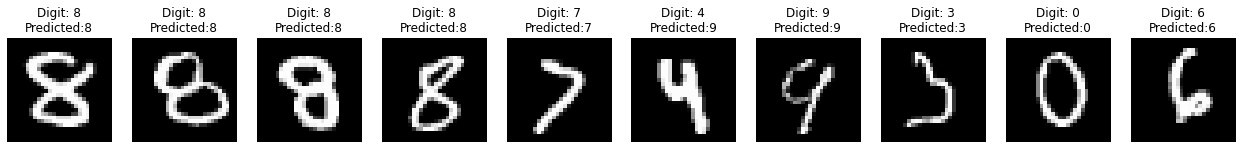

Ottimizzatore Adam


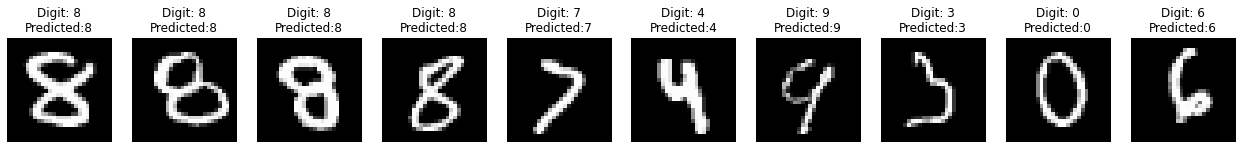

Ottimizzatore Adadelta


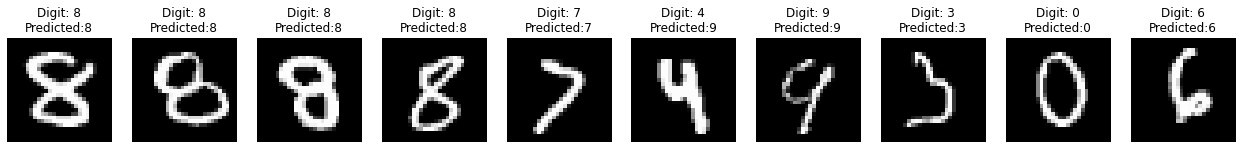

Ottimizzatore Adamax


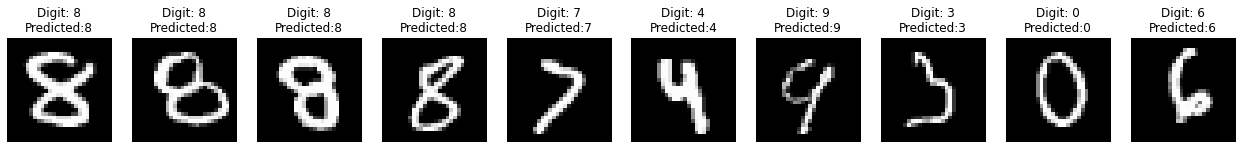

In [31]:
optimizers = [SGD, Adam, Adadelta,Adamax]
names = ["SGD", "Adam", "Adadelta",  "Adamax"]

X = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = [model.predict(X) for model in model_DNN]

X = X.reshape(X_test.shape[0], img_rows, img_cols,1)

#print('Risultati in ordine di ottimizzatore usato:')
#for name in names:
 #   print('Ottimizzatore ' + name)
k = 0 
for j in range(len(optimizers)):
    print('Ottimizzatore ' + names[k])
    plt.figure(figsize=(22, 15)) 
    for i in range(10):    
        shift = 876
        ax = plt.subplot(2, 10, i + 1)    
        plt.imshow(X[i+shift, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i+shift]), np.argmax(predictions[j][i+shift])))    
        plt.axis('off') 
    k = k+1
    plt.show()


Osserviamo che tutti gli ottimizzatori fanno una predizione corretta. Vengono commessi alcuni errori, soprattutto quando le cifre non sono esattamente scritte benissimo

Scegliamo di provare a fare delle previsioni utilizzando gli ottimizzatori che sembrano avere una performance migliore 

# Esercizio 2
Modifichiamo l'architettura della DNN usando dei layers convoluzionali. Usiamo, `Conv2D`, `MaxPooling2D`, `Dropout`, ma anche `Flatten`, un layer`Dense` standard e`soft-max` alla fine. 


## Creazione della convolutional Neural Network
Una rete neurale convoluzionale (CNN) è un tipo di rete neurale artificiale in cui i neuroni individuali sono disposti in maniera tale da rispondere alle regioni di sovrapposizione che tassellano il campo visivo. 

 Una CNN ha solitamente tre layer:
- un layer convulazionale: questo layer compie un prodotto tra due matrici, uno dato dal set di parametri imparabili e un'altra matrice. Aggiungendo un layer Conv2D alla rete diamo origine a una rete convulazionale. questo Layer crea un kernel convulazionale che si combina con il layer di input per produrre un tensore di output.
- un pooling layer: questo layer sostituisce l'output del network in una certa posizione derivando una combinazione degli output vicini. Questo aiuta a ridurre la dimensione della rappresentazione spaziale e a diminuire il numero di calcoli necessari. 
- Osserviamo che aggiungiamo inoltre un layer Dropout per evitare loverfitting. Esso infatti setta randomicamente degli input a 0 con un certo rate.  
- Applichiamo inoltre un layer di Flatten, che permette di appiattire l'input

Di seguito prepariamo i dati di input

In [32]:
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')



X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


E creiamo il modello tenendo conto delle precedenti osservazioni

In [33]:
from keras.layers import Flatten, Conv2D, MaxPooling2D
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu',input_shape=input_shape))
    
    # add first max-pooling layer with 2x2 filters
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    
    # add second convolutional layer with 16 5x5 filters
    model.add(Conv2D(16, kernel_size=(5, 5), 
                     strides=1, 
                     activation='relu',
                     input_shape=input_shape))
    
    # add second max-pooling layer with 2x2 filters
    model.add(MaxPooling2D(strides=2))
    
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    model.add(Flatten())
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adamax(),
                  metrics=['acc'])
    return model



In [34]:

# training parameters
batch_size = 32
epochs = 10

# create the deep conv net
model_CNN=create_CNN()
model_CNN.summary()



Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          4016      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 dropout_16 (Dropout)        (None, 4, 4, 16)          0         
                                                                 
 flatten (Flatten)           (None, 256)             

In [35]:
history1 = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4770 - acc: 0.8525 - val_loss: 0.1278 - val_acc: 0.9622
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1959 - acc: 0.9404 - val_loss: 0.0851 - val_acc: 0.9744
Epoch 3/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.1566 - acc: 0.9528 - val_loss: 0.0688 - val_acc: 0.9792
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1375 - acc: 0.9585 - val_loss: 0.0595 - val_acc: 0.9810
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1250 - acc: 0.9609 - val_loss: 0.0518 - val_acc: 0.9846
Epoch 6/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.1143 - acc: 0.9650 - val_loss: 0.0479 - val_acc: 0.9842
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1091 - acc: 0.9666 - val_loss: 0.0440 - val_acc: 0.9852
Epoch 8/10
1875/1875 [==========================

In [36]:
colors = {"DNN":"#21295c" , "CNN":"#772e25"  }

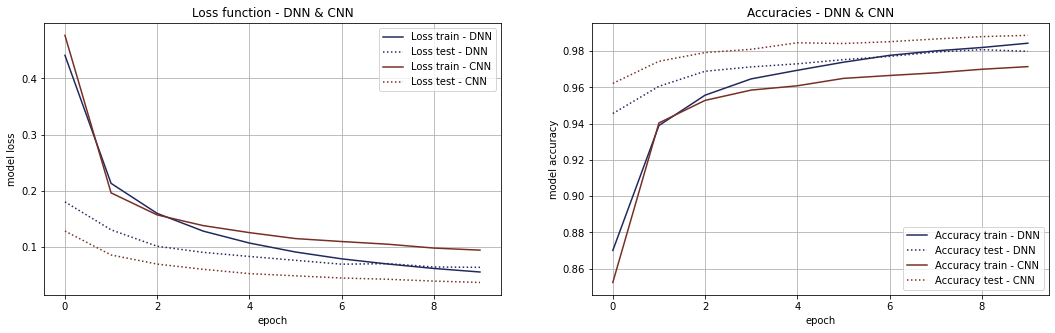

In [37]:
fig, plts=plt.subplots(1,2)
fig.set_figwidth(18)
fig.set_figheight(5)

plts[0].set_title("Loss function - DNN & CNN")
plts[0].plot(histories[3].history['loss'], color = colors["DNN"])
plts[0].plot(histories[3].history['val_loss'], color = colors["DNN"], linestyle = "dotted")
plts[0].plot(history1.history['loss'], color = colors["CNN"])
plts[0].plot(history1.history['val_loss'], color = colors["CNN"], linestyle = "dotted")
plts[0].set_ylabel('model loss')
plts[0].set_xlabel('epoch')
plts[0].legend(['Loss train - DNN', 'Loss test - DNN','Loss train - CNN', 'Loss test - CNN' ], loc='best')
plts[0].grid()

plts[1].set_title("Accuracies - DNN & CNN")
plts[1].plot(histories[3].history['acc'],color = colors["DNN"])
plts[1].plot(histories[3].history['val_acc'],color = colors["DNN"], linestyle = "dotted")
plts[1].plot(history1.history['acc'],color = colors["CNN"]) 
plts[1].plot(history1.history['val_acc'],color = colors["CNN"], linestyle = "dotted")
plts[1].legend(['Accuracy train - DNN', 'Accuracy test - DNN','Accuracy train - CNN', 'Accuracy test - CNN' ], loc='best')
plts[1].set_ylabel('model accuracy')
plts[1].set_xlabel('epoch')
#plts[1].legend()
plts[1].grid()

### Valutazione della performance della CNN

313/313 [==============================] - 2s 5ms/step
In ordine: le predizioni della rete convoluzionale e quelle della rete non convoluzionale


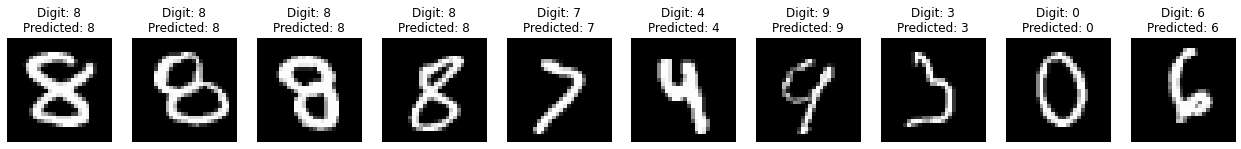

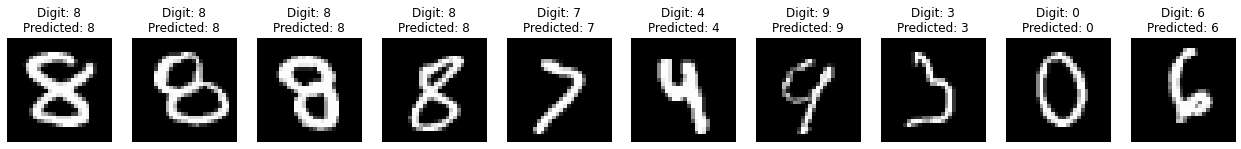

In [38]:
X = X.reshape(X_test.shape[0], img_rows, img_cols,1)
predictions_new = model_CNN.predict(X)

print('In ordine: le predizioni della rete convoluzionale e quelle della rete non convoluzionale')

plt.figure(figsize=(22, 15)) 
for i in range(10):    
    shift = 876
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X[i+shift, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i+shift]), np.argmax(predictions_new[i+shift])))    
    plt.axis('off') 
plt.show()

plt.figure(figsize=(22, 15)) 
for i in range(10):    
    shift = 876
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X[i+shift, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i+shift]), np.argmax(predictions[3][i+shift])))    
    plt.axis('off') 
plt.show()

Osserviamo che la performance della CNN migliora, e sono riconosciute tutte le cifre proposte

# Esercizio 3
Usando l'applicazione `gimp` per creare 10 immagini di cifre, importiamole nel jupyter-notebook e cerchiamo di vedere se la CNN è in grado di riconoscerle. 

In [39]:
# TO LOAD FILES ON GOOGLE COLAB
#from google.colab import files
#upload = files.upload() #this will let you browse and choose the file to be uploaded

Utilizziamo la CNN precedentemente creata e utilizziamo per fare delle previsioni su numeri da noi generati. 
Riportiamo di seguito i risultati: 

1/1 [==============================] - 0s 22ms/step


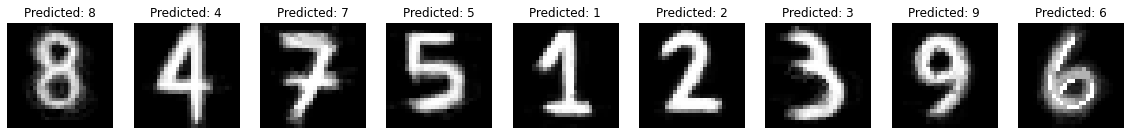

In [40]:
from PIL import Image
import os
files = {"Numeri/uno.png", "Numeri/due.png", "Numeri/tre.png", "Numeri/quattro.png", 
         "Numeri/cinque.png", "Numeri/sei.png", "Numeri/sette.png", "Numeri/otto.png", "Numeri/nove.png"}
tot = len(files)
#digit_in = [Image.open(file).convert('L') for file in files]
digits = []
pixs = []
datas = []
for file in files: 
    digit = Image.open(file).convert('L')
    digits.append(digit)
    ydim, xdim = digit.size
    pixs.append(digit.load())
    datas.append(np.zeros((xdim, ydim)))
    
for k in range(len(files)): 
    for j in range(ydim):
        for i in range(xdim):
            datas[k][i,j]=pixs[k][j,i]

fig, plts = plt.subplots(1,tot)
fig.set_figwidth(20)
fig.set_figheight(7)
k = 0
for data in datas:
    plts[k].imshow(data, cmap='gray')
    plts[k].axis('off') 
    shift = 876
    data = data.reshape(1,xdim,ydim,1)
    predict = model_CNN.predict(data)
    data = data.reshape(xdim,ydim)
    plts[k].set_title("Predicted: {}".format(np.argmax(predict)))
        #plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i+shift]), np.argmax(predictions[j][i+shift])))    

    k =k+1



Osserviamo che la CNN è in grado di identificare tutte le cifre correttamente. Ripetiamo il procedimento e testiamo nuovamente la CNN su delle cifre scritte in modo più "confuso"

Risultati utilizzando la CNN

1/1 [==============================] - 0s 19ms/step


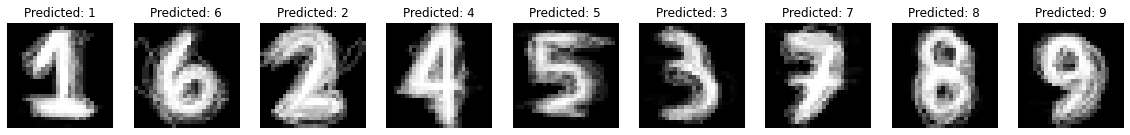

In [41]:
from PIL import Image
import os
files = {"confused/1.png", "confused/2.png", "confused/3.png", "confused/4.png","confused/5.png", "confused/6.png", "confused/7.png", "confused/8.png", "confused/9.png"}
tot = len(files)
#digit_in = [Image.open(file).convert('L') for file in files]
digits = []
pixs = []
datas = []
for file in files: 
    digit = Image.open(file).convert('L')
    digits.append(digit)
    ydim, xdim = digit.size
    pixs.append(digit.load())
    datas.append(np.zeros((xdim, ydim)))
    
for k in range(len(files)): 
    for j in range(ydim):
        for i in range(xdim):
            datas[k][i,j]=pixs[k][j,i]

fig, plts = plt.subplots(1,tot)
fig.set_figwidth(20)
fig.set_figheight(7)
k = 0
print("Risultati utilizzando la CNN")
print()
for data in datas:
    plts[k].imshow(data, cmap='gray')
    plts[k].axis('off') 
    shift = 876
    data = data.reshape(1,xdim,ydim,1)
    predict = model_CNN.predict(data)
    data = data.reshape(xdim,ydim)
    plts[k].set_title("Predicted: {}".format(np.argmax(predict)))
        #plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i+shift]), np.argmax(predictions[j][i+shift])))    

    k =k+1

Peggioriamo ulteriormente la qualità delle immagini per valutare la performance della rete 

In [42]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import optimizers, losses, metrics
from keras.datasets import mnist 
from keras.layers import Dense, Dropout
from PIL import Image

Risultati utilizzando la CNN

1/1 [==============================] - 0s 20ms/step


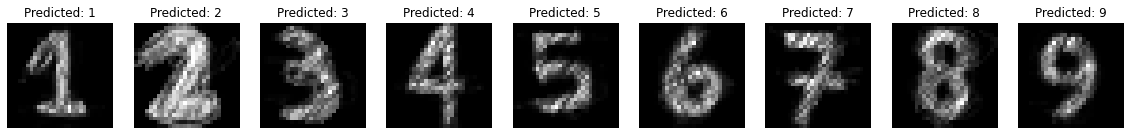

In [43]:
from PIL import Image
import os
files = ["Numeri/1.png", "Numeri/2.png", "Numeri/3.png", "Numeri/4.png","Numeri/5.png", "Numeri/6.png", "Numeri/7.png", "Numeri/8.png", "Numeri/9.png"]
tot = len(files)
#digit_in = [Image.open(file).convert('L') for file in files]
digits = []
pixs = []
datas = []
for file in files: 
    digit = Image.open(file).convert('L')
    digits.append(digit)
    ydim, xdim = digit.size
    pixs.append(digit.load())
    datas.append(np.zeros((xdim, ydim)))
    
for k in range(len(files)): 
    for j in range(ydim):
        for i in range(xdim):
            datas[k][i,j]=pixs[k][j,i]

fig, plts = plt.subplots(1,tot)
fig.set_figwidth(20)
fig.set_figheight(7)
k = 0
print("Risultati utilizzando la CNN")
print()
for data in datas:
    plts[k].imshow(data, cmap='gray')
    plts[k].axis('off') 
    shift = 876
    data = data.reshape(1,xdim,ydim,1)
    predict = model_CNN.predict(data)
    data = data.reshape(xdim,ydim)
    plts[k].set_title("Predicted: {}".format(np.argmax(predict)))
        #plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i+shift]), np.argmax(predictions[j][i+shift])))    

    k =k+1

## Conclusioni

Sono stati creati due modelli correttamente funzionanti per l'analisi delle immagini. Valutiamo che quanto fatto per le 10 cifre può essere applicato anche al caso del riconoscimento di lettere, il principio è lo stesso, ma sarà necessario aumentare il numero di neuroni ,in quanto aumenterà il numero di possibilità 